In [32]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset
data=pd.read_csv('/content/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# getting the total number of rows and columns
data.shape

(891, 12)

In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# checking the number of missing values in the columns
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# handling the missing values in the columns
data=data.drop(columns='Cabin',axis=1)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [17]:
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [18]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [37]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# data analysis

data.corr()

<ipython-input-20-ffb60bc8a370>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


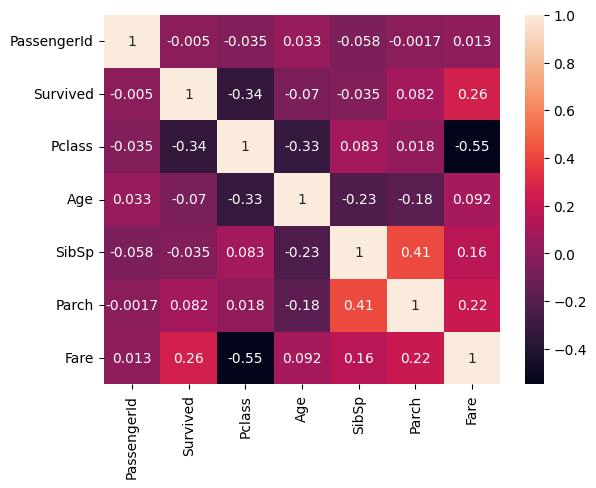

<Figure size 1000x1500 with 0 Axes>

In [33]:
sns.heatmap(data=data.corr(),annot=True)
plt.figure(figsize=(10,15))
plt.show()

In [34]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


<Axes: xlabel='Survived', ylabel='count'>

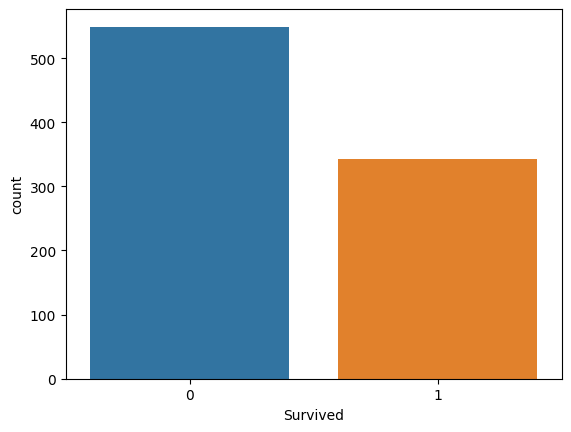

In [36]:
sns.countplot(x='Survived',data=data)


<Axes: xlabel='Sex', ylabel='count'>

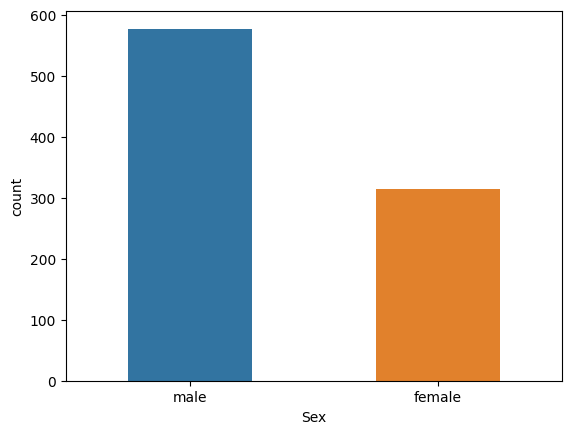

In [45]:
sns.countplot(x='Sex',data=data,width=0.5)


Text(0.5, 1.0, 'Surviver (number)')

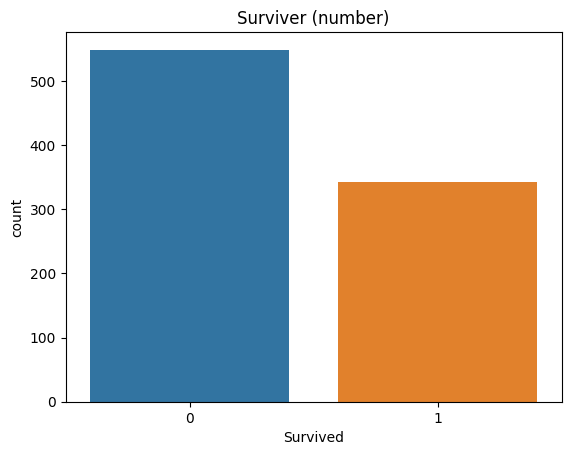

In [47]:
# number of surviver

sns.countplot(x='Survived',data=data)
plt.title('Surviver (number)')

In [48]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

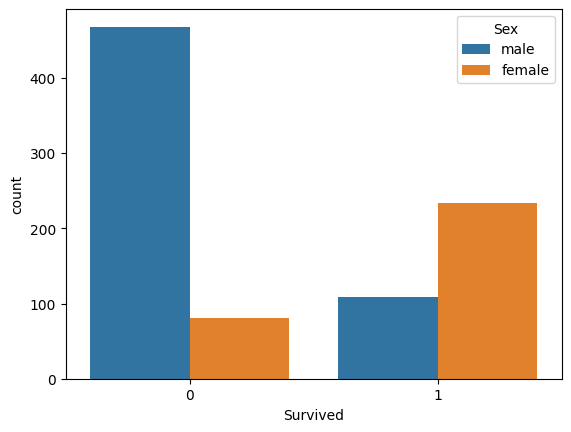

In [50]:
# Number of surviver gender wise
sns.countplot(x='Survived',hue='Sex',data=data)

In [56]:
# number of surviver gender wise
survived_gender=data[data['Survived']==1].groupby('Sex')['Survived'].value_counts()
print(survived_gender)

Sex     Survived
female  1           233
male    1           109
Name: Survived, dtype: int64


In [57]:
# number of unsurviver gender wise
unsurvived_gender=data[data['Survived']==0].groupby('Sex')['Survived'].value_counts()
print(unsurvived_gender)

Sex     Survived
female  0            81
male    0           468
Name: Survived, dtype: int64


In [58]:
# Converting categorical data
data.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [64]:
data.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [65]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [67]:
# Separating dependent and independent variables
X=data.drop(columns=['PassengerId','Survived','Name','Ticket'],axis=1)
y=data['Survived']


In [68]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [70]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (596, 7) (295, 7)


In [73]:
print(y.shape,y_train.shape,y_test.shape)

(891,) (596,) (295,)


In [74]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
print(model)

LogisticRegression()


In [75]:
model.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred=model.predict(X_test)

In [79]:
# accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8135593220338984

In [80]:
# creating confusion matrices
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[153,  22],
       [ 33,  87]])

In [81]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [86]:
# making predictive system
pclass=int(input('Enter the passenger class:'))
sex= int(input('Enter the sex.\nEnter 0 for male.\nEnter 1 for female.'))
age=float(input('Enter age: '))
sibsp=int(input('Enter SIBSP:'))
parch=int(input('Enter Parch:'))
fare=float(input('Enter fare:'))
embarked=int(input('Enter embarked:'))
input_data=(pclass,sex,age,sibsp,parch,fare,embarked)

numpy_array=np.asarray(input_data)

reshaped_array=numpy_array.reshape(1,-1)

prediction=model.predict(reshaped_array)

if prediction==1:
  print("The passenger is survived.")
else:
    print("The passenger is not survived.")

Enter the passenger class:3
Enter the sex.
Enter 0 for male.
Enter 1 for female.0
Enter age: 35.0
Enter SIBSP:0
Enter Parch:0
Enter fare:8.05
Enter embarked:0
The passenger is not survived.
